# Detecção de Fraude em Transações Bancárias

Projeto realizado durante a formação [Machine Learning para Negócios Digitais](https://cursos.alura.com.br/formacao-machine-learning-negocios-digitais), da [Alura](https://alura.com.br), com a instrutora [Sthefanie Monica](https://www.linkedin.com/in/sthefanie-monica/). 

Vamos criar um modelo de detecção de fraude em transações de cartões de crédito.

Para isso, utilizaremos os dados [Fraud Detection Example](https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example), do Kaggle. Todos os dados utilizados são sintéticos, criados por simulação.

O dataset contém as seguintes informações:

**step** - unidade de tempo (hora)

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT e TRANSFER (caixa-de-entrada, caixa-de-saída, débito, pagamento e transferência).

**amount** - valor da transação na moeda local.

**nameOrig** - cliente que originou a transação

**oldbalanceOrg** - saldo inicial (antes da transação)

**newbalanceOrig** - novo saldo (depois da  transação)

**nameDest** - cliente destinatário da transação

**oldbalanceDest** - saldo inicial do destinatário antes da transação.

**newbalanceDest** - novo saldo do destinatário depois da transação.

**isFraud** - Transações feitas por agentes fraudulentos que visam assumir o controle de contas de clientes e esvaziá-las fazendo transações para outras contas e então sacando o dinheiro.

**isFlaggedFraud** - Tentativa ilegal de transferir uma quantidade massiva de dinheiro em uma única transação. Como se fosse um alerta de fraude.

### Carregando e explorando os dados

In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv('./Dados/fraud_dataset_example.csv')
dados

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


Observamos que o dataset possui 101613 registros, o que é um número razoável para podermos realizar nossas análises e criar nossos modelos.

In [2]:
# Contagem de NAs
dados.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Vemos também que não possuímos nenhum valor nulo nos dados.

In [3]:
# Trazendo as colunas de fraude para o início do dataframe
dados = dados[['isFraud','isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
dados

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00
101609,0,0,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97
101610,0,0,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00
101611,0,0,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43


In [4]:
# Renomeando as colunas para o português
dados.rename(columns = {
    'isFraud':'fraude',
    'isFlaggedFraud':'alerta_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente_1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'saldo_final_c1',
    'nameDest':'cliente_2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'saldo_final_c2'
}, inplace = True)
dados

,fraude,alerta_fraude,tempo,tipo,valor,cliente_1,saldo_inicial_c1,saldo_final_c1,cliente_2,saldo_inicial_c2,saldo_final_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00
2,1,0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00
3,1,0,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00
101609,0,0,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97
101610,0,0,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00
101611,0,0,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43


In [5]:
# Algumas estatísticas do dataset, como média, valores mínimos, valores máximos, etc.
dados.describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.100000e-03,3.380000e-02,0.00,0.00,0.00,0.00,1.00
alerta_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523500e+00,1.820700e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
saldo_final_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
saldo_final_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [6]:
# Olhando os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   alerta_fraude     101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente_1         101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   saldo_final_c1    101613 non-null  float64
 8   cliente_2         101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  saldo_final_c2    101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


Agora, vamos olhar como estão distribuídas nossas variáveis-alvo:

In [7]:
dados.groupby('fraude').fraude.count()

fraude
0    101497
1       116
Name: fraude, dtype: int64

In [8]:
dados.groupby('alerta_fraude').alerta_fraude.count()

alerta_fraude
0    101613
Name: alerta_fraude, dtype: int64

Vemos que nosso dataset está bem desbalanceado, e a variável alerta_fraude apresenta apenas valores zero, então podemos excluir essa variável do dataset por não possuir nenhuma informação relevante.

<AxesSubplot:>

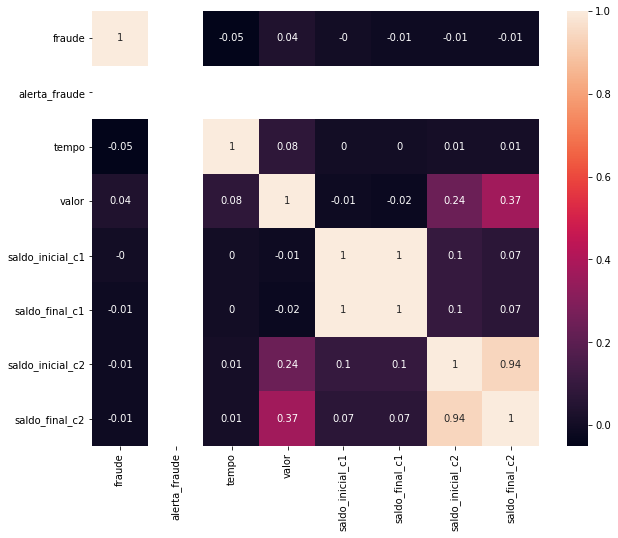

In [9]:
# Matriz de correlação
import seaborn as sns
%matplotlib inline

fig = sns.heatmap(dados.corr().round(2), annot = True)
fig.figure.set_size_inches(10,8)
fig

### Algumas análises utilizando o pandas_profiling


In [10]:
import pandas_profiling
pandas_profiling.ProfileReport(dados)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Transformando nossos dados

Vimos que a variável tipo é categórica, então teremos que transformá-la em dummies para deixá-la utilizável pelo modelo:

In [11]:
# transformando a variável tipo em dummies
dados = pd.get_dummies(dados, columns=['tipo'])
dados

,fraude,alerta_fraude,tempo,valor,cliente_1,saldo_inicial_c1,saldo_final_c1,cliente_2,saldo_inicial_c2,saldo_final_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,0,10,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0,0,1,0
101609,0,0,10,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,1,0,0,0
101610,0,0,10,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0,0,1,0
101611,0,0,10,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0,0,0,1


Agora, vamos remover colunas de nomes e a de alerta_fraude:

In [12]:
# Removendo colunas
dados.drop(columns=['alerta_fraude', 'cliente_1', 'cliente_2'], inplace = True)
dados

,fraude,tempo,valor,saldo_inicial_c1,saldo_final_c1,saldo_inicial_c2,saldo_final_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,0,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,0,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
101608,0,10,7477.02,785.00,0.00,0.00,0.00,0,0,0,1,0
101609,0,10,282252.35,220339.29,0.00,95156.01,91286.97,0,1,0,0,0
101610,0,10,17289.01,0.00,0.00,0.00,0.00,0,0,0,1,0
101611,0,10,1347146.45,1605.00,0.00,541639.43,2186953.43,0,0,0,0,1


### Balanceando os dados

Como vimos anteriormente, existem muito mais dados sobre operações não fraudulentas do que sobre operações fraudulentas. Isso vai afetar diretamente a performance dos modelos de machine learning que criaremos, pois o modelo irá aprender muito mais sobre apenas uma classe dos dados. Isso também pode "maquiar" a acurácia, pois basta o modelo chutar que todas as classes são não fraudulentas que ele já teria uma boa acurácia, porém não significa necessariamente que o modelo está bom e correto.

Vamos balancear nossos dados usando a técnica **SMOTE**, que combina oversampling com undersampling, gerando dados sintéticos baseados nos dados que já temos. Para usar o SMOTE, precisamos dividir os dados em variáveis explicativas (x) e variavel alvo (y):

In [13]:
# Aplicando SMOTE
from imblearn.over_sampling import SMOTE

SEED = 123
np.random.seed(SEED)

x = dados.drop('fraude', axis = 1)
y = dados['fraude']

smt = SMOTE(random_state = SEED)
x, y = smt.fit_resample(x, y)

dados_final = pd.concat([x,y], axis = 1)
dados_final

,tempo,valor,saldo_inicial_c1,saldo_final_c1,saldo_inicial_c2,saldo_final_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER,fraude
0,1,9.839640e+03,1.701360e+05,160296.36,0.000000,0.000000,0,0,0,1,0,0
1,1,1.864280e+03,2.124900e+04,19384.72,0.000000,0.000000,0,0,0,1,0,0
2,1,1.810000e+02,1.810000e+02,0.00,0.000000,0.000000,0,0,0,0,1,1
3,1,1.810000e+02,1.810000e+02,0.00,21182.000000,0.000000,0,1,0,0,0,1
4,1,1.166814e+04,4.155400e+04,29885.86,0.000000,0.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,1.026173e+06,1.026173e+06,0.00,0.000000,0.000000,0,0,0,0,1,1
202990,3,1.820100e+04,1.820100e+04,0.00,0.000000,0.000000,0,0,0,0,1,1
202991,3,6.618865e+03,6.618865e+03,0.00,31151.991928,11980.975598,0,1,0,0,0,1
202992,1,2.184622e+03,2.184622e+03,0.00,25013.688137,0.000000,0,1,0,0,0,1


Agora, podemos gerar um gráfico para ver como ficou o balanceamento:

D:\Python3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Distribuição da variável-alvo fraude'}, xlabel='Fraude', ylabel='Frequência'>

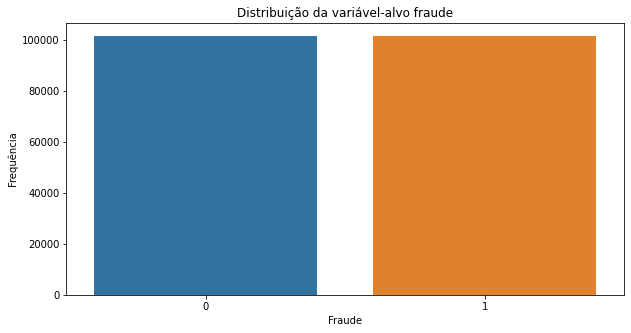

In [14]:
fig = sns.countplot(dados_final['fraude'])
fig.figure.set_size_inches(10,5)
fig.set_title('Distribuição da variável-alvo fraude')
fig.set_xlabel('Fraude')
fig.set_ylabel('Frequência')
fig

Vemos que agora ambas as classes ficaram com o mesmo número de registros. Então agora podemos criar nossos modelos de previsão:

### Criando os modelos de previsão

Primeiro, vamos dividir os dados em treino e teste:

In [15]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

x = dados_final.drop('fraude', axis = 1)
y = dados_final['fraude']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=SEED)

#### Regressão Logística
Primeiro, vamos criar um modelo de regressão logística:

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=SEED)
lr.fit(x_train, y_train)

lr

LogisticRegression(random_state=123)

O primeiro modelo está criado. Agora, vamos ver como ele se comporta nos dados de teste avaliando as métricas e a matriz de confusão:

In [17]:
# Avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

previsao = lr.predict(x_test)

acuracia = accuracy_score(y_test, previsao) * 100
precisao = precision_score(y_test, previsao) * 100
recall = recall_score(y_test, previsao) * 100
f1 = f1_score(y_test, previsao)

print('Acurácia = %.2f%%' % acuracia)
print('Precisão = %.2f%%' % precisao)
print('Recall = %.2f%%' % recall)
print('F1-Score = %.2f' % f1)

Acurácia = 93.98%
Precisão = 92.32%
Recall = 95.88%
F1-Score = 0.94


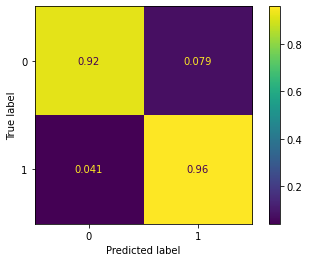

In [18]:
# Matriz de confusão
cm = confusion_matrix(y_test, previsao, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#### Curva ROC

Com a Curva Roc conseguimos validar o modelo em si. Ela é característica de operação do receptor e se trata de uma curva que se aproxima do valor 1. Nós vamos avaliá-la considerando quão próxima está do valor 1. Além disso, ela trará outra métrica junto que é a AUC (Are Under the Curve) ou Área sob a curva.

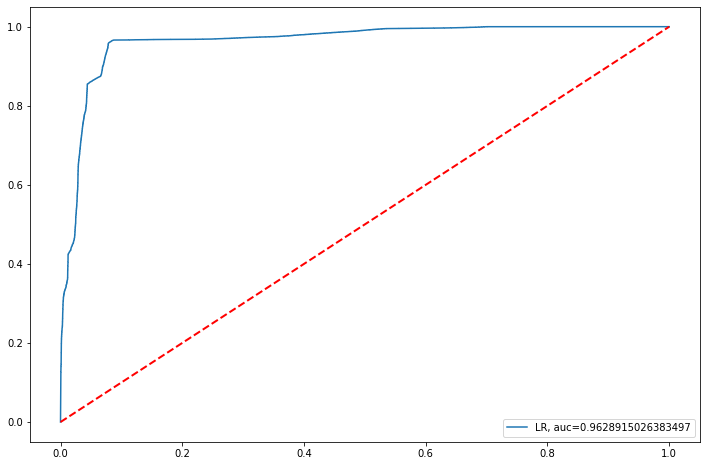

In [19]:
# curva ROC
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = lr.predict_proba(x_test)[::, 1]

fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

Nesse tipo de problema, a métrica mais importante para avaliarmos a qualidade do modelo é o **Recall**, que indica quantas fraudes foram classificadas corretamente como fraudes. No nosso modelo de regressão logística, obtivemos um recall de quase 96%, ou seja, 96% das fraudes estão sendo detectadas pelo modelo, e apenas 4% não estão.

### Formulando algumas hipóteses

Aqui, vamos realizar algumas análises para tentarmos saber mais sobre o comportamento das fraudes, o que as causa, etc.

[]

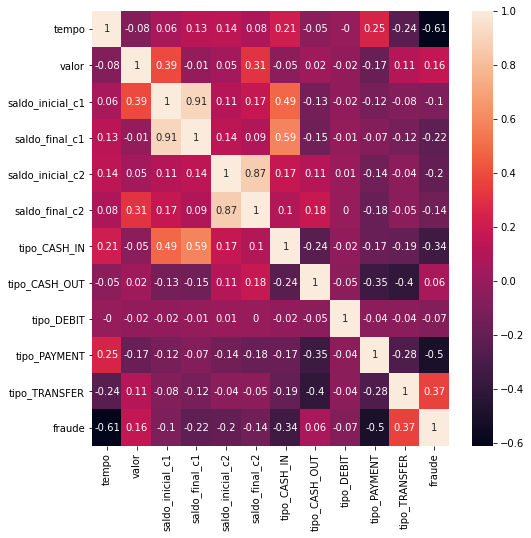

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Matriz de correlação
plt.figure(figsize=(8,8))
ax = sns.heatmap(dados_final.corr().round(2), annot=True)
plt.plot()

Pelo gráfico, podemos ver que a variável fraude tem alta correlação com as variáveis tempo, tipo_PAYMENT, e tipo_TRANSFER. Com isso, podemos formular algumas hipóteses:
    
- As operações de fraude geralmente ocorrem mais pelo tipo_TRANSFER do que os outros tipos;
- Se o tipo da operação for PAYMENT, a chance de ser fraude é menor, assim como tipo CASH-IN;
- As operações de fraude costumam ocorrer em um período mais cedo do dia, como de madrugada;


### Testando outros modelos

Agora, vamos testar o comportamento de outros modelos de previsão nos nosso dados, para ver qual deles performa melhor. Vamos utilizar a **Árvore de Decisão** e o **Random Forest**, que consiste em várias árvores de decisão.

In [43]:
# Funções para avaliar o modelo
def avaliar_modelo(y_true, pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    acuracia = accuracy_score(y_true, pred) * 100
    precisao = precision_score(y_true, pred) * 100
    recall = recall_score(y_true, pred) * 100
    f1 = f1_score(y_true, previsao)

    print('Acurácia = %.2f%%' % acuracia)
    print('Precisão = %.2f%%' % precisao)
    print('Recall = %.2f%%' % recall)
    print('F1-Score = %.2f' % f1)
    
def matriz_confusao(y_true, pred, porcent = None):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    if porcent:
        cm = confusion_matrix(y_true, pred, normalize=porcent)
    else:
        cm = confusion_matrix(y_true, pred)
        
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    
def curva_roc(x_teste, y_teste, modelo):
    import matplotlib.pyplot as plt
    from sklearn import metrics

    y_pred_proba = modelo.predict_proba(x_teste)[::, 1]

    fpr, tpr, _= metrics.roc_curve(y_teste, y_pred_proba)

    auc = metrics.roc_auc_score(y_teste, y_pred_proba)

    plt.rcParams['figure.figsize'] = (12., 8.)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

In [34]:
# Árvore de decisão
from sklearn.tree import DecisionTreeClassifier

SEED = 123
np.random.seed(SEED)

tree = DecisionTreeClassifier(random_state=SEED)
tree.fit(x_train, y_train)

previsao = tree.predict(x_test)

avaliar_modelo(y_test, previsao)

Acurácia = 99.86%
Precisão = 99.77%
Recall = 99.94%
F1-Score = 1.00


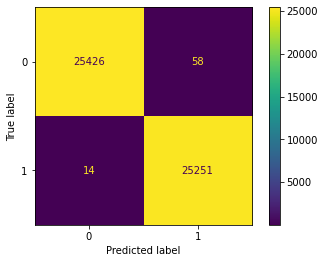

In [38]:
# Matriz de confusão - árvore de decisão
matriz_confusao(y_test, previsao)

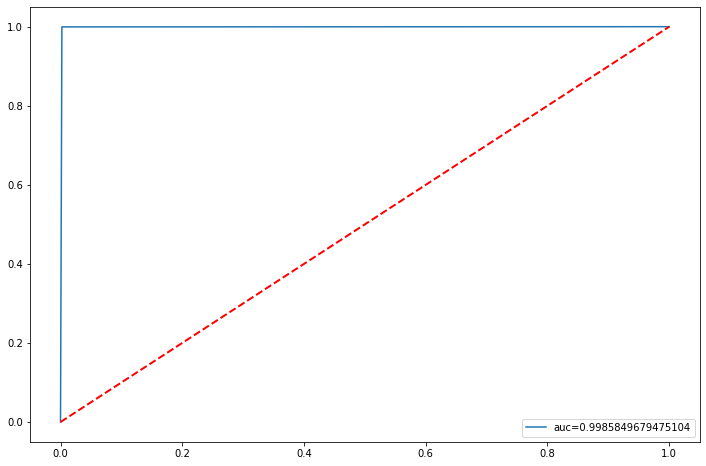

In [44]:
# Curva roc - árvore de decisão
curva_roc(x_test, y_test, tree)

Vemos que o modelo de árvore de decisão performa quase que perfeitamente nos dados de teste, atingindo quase 100% em todas as métricas. Vamos avaliar agora o modelo de árvore aleatória:

In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

SEED = 123
np.random.seed(SEED)

rf = RandomForestClassifier(random_state=SEED)
rf.fit(x_train, y_train)

previsao = rf.predict(x_test)

avaliar_modelo(y_test, previsao)

Acurácia = 99.94%
Precisão = 99.89%
Recall = 99.98%
F1-Score = 1.00


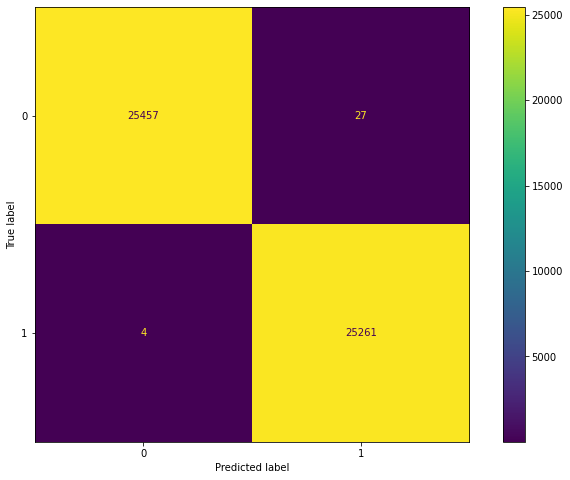

In [41]:
# Matriz de confusão
matriz_confusao(y_test, previsao)

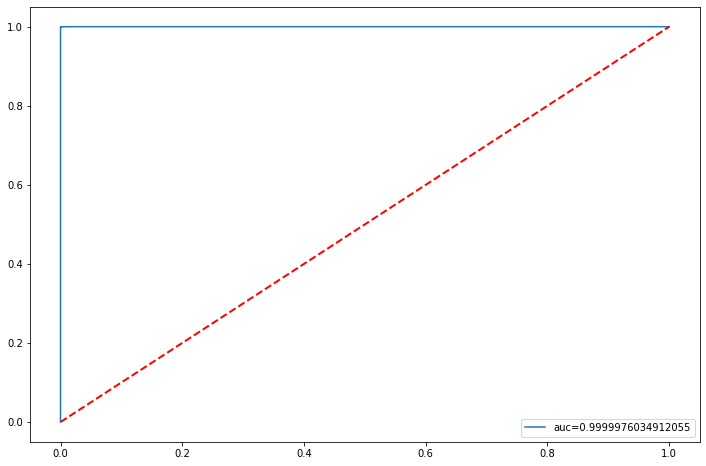

In [45]:
# Curva ROC
curva_roc(x_test, y_test, rf)

Como podemos ver, o modelo de Random Forest performou ainda melhor, deixando passar apenas 4 fraudes. Ainda podemos melhorá-lo, tanto nas métricas quanto no tempo de fitting, utilizando a otimização de hiperparâmetros através de cross-validation e busca aleatória.

### Otimização de Hiperparâmetros (RandomizedSearchCV)

Vamos tentar otimizar o modelo de Random Forest utilizando RandomizedSearchCV:

In [62]:
# Random Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
from scipy.stats import randint

filterwarnings('ignore')

SEED = 123

param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': randint(1,128),
    'min_samples_leaf': randint(1,128)
}

busca = RandomizedSearchCV(RandomForestClassifier(random_state=SEED),
                          param_grid,
                          n_iter = 5,
                          cv = 3,
                          random_state=SEED,
                          scoring = 'recall',
                          n_jobs=-1)

busca.fit(x, y)

resultados = pd.DataFrame(busca.cv_results_)
resultados.sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,49.843956,3.621179,2.260421,0.112210,gini,None,112,26,500,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.995005,0.997399,0.994088,0.995497,0.001396,1
3,11.484521,0.201559,0.321630,0.018005,entropy,5,48,74,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.972836,0.997961,0.978925,0.983241,0.010701,2
1,23.636925,0.141008,0.938403,0.001772,gini,5,18,84,200,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.972570,0.995507,0.975763,0.981280,0.010144,3
2,8.894971,0.211328,0.412575,0.009818,entropy,3,87,98,50,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.914519,0.993970,0.954688,0.954392,0.032437,4
0,7.038346,0.127412,0.471569,0.011448,gini,3,127,67,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.931160,0.965744,0.914341,0.937082,0.021398,5


In [63]:
# Obtendo os melhores parâmetros
melhores_parametros = busca.best_params_
melhores_parametros

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 112,
 'min_samples_split': 26,
 'n_estimators': 500}

In [65]:
# Obtendo o melhor modelo
melhor_modelo = busca.best_estimator_
melhor_modelo

RandomForestClassifier(min_samples_leaf=112, min_samples_split=26,
                       n_estimators=500, random_state=123)

In [66]:
# Treinando o modelo final
SEED = 123

modelo_final = RandomForestClassifier(**melhores_parametros, random_state=SEED)
modelo_final.fit(x_train, y_train)
modelo_final

RandomForestClassifier(min_samples_leaf=112, min_samples_split=26,
                       n_estimators=500, random_state=123)

In [60]:
previsao = modelo_final.predict(x_test)

avaliar_modelo(y_test, previsao)

Acurácia = 99.29%
Precisão = 99.16%
Recall = 99.42%
F1-Score = 0.99


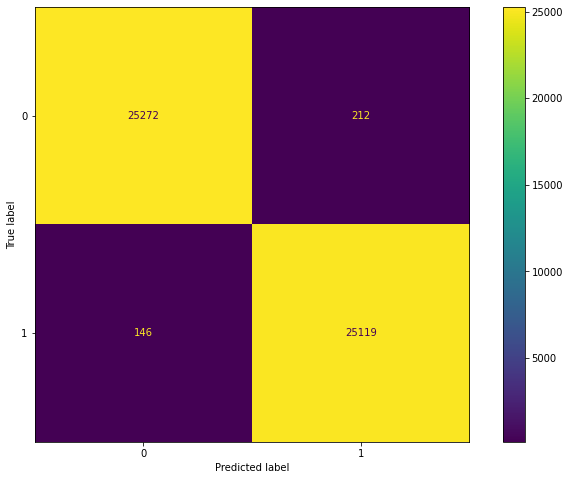

In [67]:
# Matriz de confusao
matriz_confusao(y_test, previsao)

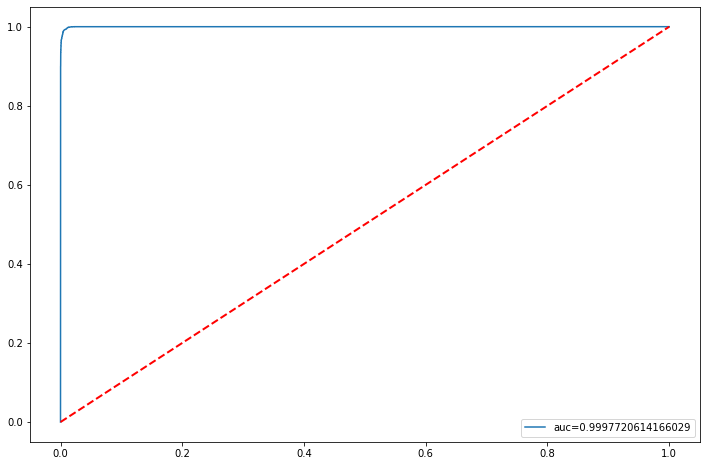

In [68]:
# curva ROC
curva_roc(x_test, y_test, modelo_final)

Apesar de obtermos um Recall um pouco menor, este modelo é mais confiável, pois foi realizado uma validação cruzada, ou seja, o modelo foi avaliado em vários conjuntos de treino e teste, e se manteve mais estável e com melhor performance do que os outros. O Recall ainda é excelente, de quase 100%, deixando passar 146 casos de fraude. Abaixo, podemos ver quanto de dinheiro dos dados de teste que seria vítima de fraude o modelo conseguiu detectar e "salvar", e quanto ele deixou passar.

In [81]:
resultado = pd.concat([x_test, y_test], axis = 1)
resultado['previsao'] = previsao
previstos_correto = resultado.query("fraude == previsao")
previstos_errado = resultado.query("fraude != previsao")

dinheiro_salvo = previstos_correto[previstos_correto['fraude'] == 1]['valor'].sum()
dinheiro_perdido = previstos_errado[previstos_errado['fraude'] == 1]['valor'].sum()
dinheiro_total_fraude = resultado[resultado['fraude'] == 1]['valor'].sum()

print('Dinheiro salvo: ',format(dinheiro_salvo.round(2), ','))
print('Dinheiro perdido: ',format(dinheiro_perdido.round(2), ','))
print('Dinheiro total: ',format(dinheiro_total_fraude.round(2), ','))

Dinheiro salvo:  11,843,506,671.63
Dinheiro perdido:  42,858,038.85
Dinheiro total:  11,886,364,710.48


O modelo conseguiu prever corretamente as fraudes que juntas somam um valor total de quase 12 bilhões.

## Fim do projeto!

Obrigado por acompanhar até aqui! Após a conclusão desse projeto, é importante exportar o modelo finalizado e treinado com todos os dados (ao invés de apenas os dados de treino), para que possa ser usado em alguma aplicação que receba os dados de novas transações em tempo real, consulte o modelo e bloqueie a compra, caso o modelo indique que seja uma fraude.

Podemos também criar um captcha e/ou uma pergunta de segurança para transações feitas no período da madrugada e para transações em que o tipo utilizado seja o de transferência bancária, visando impedir que essas fraudes acontecam, visto que são as situações mais comum de ocorrerem.